    IUT de Villetaneuse - BUT S1- INFO                                            Dylan LANNUZEL & Sofiane Ammiche

# SAE 1.04 Création d’une base de données

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSJSzWp4YybYQ_q_yFQVNrmPyxeTu_AEp0img&usqp=CAU)

## Phase 1:

### Fichier CSV:

Le fichier *train.csv* est un fichier issu de la plateforme web kaggle dans le but de s'entrainer de manière compétitive à des modéles de machine learning.

Ce fichier comprend **12 attributs** représentant donc son degré, mais aussi **891 lignes** représentant sa cardinalité.

Ces 891 lignes correspondent aux nombre de personnes enregistrées et connus ayant été présent à bord du célèbre paquebot britannique *RMS Titanic* ayant fait naufrage en 1912.

#### Attributs:

- L'attribut **PassagerID** est défini par un entier positif auto-incrémenté pour permettent d'identifier de manière unique dans le fichier une personne.

- L'attribut **Survived** est défini par une valeur booléenne avec soit 1 soit 0, permettant de savoir si le passager a survecu au naufrage.

- L'attribut **Pclass** est défini par un entier positif compris entre 1 et 3 inclus pour permettre de déterminer la classe du passager sur le navire.

- L'attribut **Name** est défini par une chaine de caractère représentant le nom complet du passager.

- L'attribut **Sex** est défini par une chaine de caractère égale à "female" ou "male" qui permet de représenter le sexe du passager.

- L'attribut **Age** est défini par un entier positif représentant l'age du passager ou un flottant si estimé.

- L'attribut **SibSp** est défini par un entier positif représentant le nombre de frères, de soeurs ou d'époux/épouses 

- L'attribut **Parch** est défini par un entier positif représentant le nombre de parents ou d'enfants que possède le passager.

- L'attribut **Ticket** est défini par une chaine de caractère représentant le numéro du ticket du pasager.

- L'attribut **Fare** est défini par un nombre flottant représentant le prix du ticket.

- L'attribut **Cabin** est défini par une chaine de caractère représentant le numéro de la cabine du passager.

- L'attribut **Embarked** est défini par un caractère égal à 'S', 'C' ou 'Q' représentant la ville du port d'embarquement du passager.

### Objectif:

L'objectif va etre alors de restructurer correctement les données de ce fichier pour pouvoir les intégrer à notre base de données de manière optimale.

### Taches:



| Phases 	| Taches 	|
|:---:	|---	|
| Phase 1 	| - Analyser la composition du fichier CSV pour identifier ses caractéristiques et les valeurs représentées. 	|
| Phase 2 	| - Proposer un schéma relationnel pour créer la base de donnée lié à ce fichier CSV. 	|
|  	| - Expliquer ce schéma. 	|
|  	| - Développer un script permettant de créer la base de donnée, les tables et d’y ajouter les données. 	|
| Phase 3 	| - Récuperer les données néccéssaires à l'aide de requete SQL adaptées. 	|
|  	| - Afficher les résultat à l'aide de graphiques 	|
|  	|  	|

## Phase 2:

![](https://user-images.githubusercontent.com/45293702/139329304-4347f776-4abe-4706-b4d9-1c72bcfcd569.png)

Nous avons décidé de conserver les valeurs entières auto-incrémentées en tant que clé primaires des tables car le contexte ne nécessite pas l'utilisation de clés primaire unique générées aléatoirement et non-dépendantes de la base de données ou du serveur utilisée comme l'UUIDv4 car ici nous nous basons sur une architecture très simple avec qu'une seul base de données hébergé sur un seul et unique serveur et non avec un système de clustering/replication.

Nous avons décidé de créer 4 tables dans notre base de données, 

## Script Python:

Toutes les classes et fichiers python présentées ci-dessous ont été développées par **Dylan LANNUZEL** initialement en JAVA pour le projet [Rushcubeland](https://github.com/Rushcubeland) et ont été ensuite adaptées en python pour la SAE.

La classe **DatabaseCredentials** a été crée pour permettre de représenter en objet les identifiants de connexion à une base de données spécifiée

In [1]:
class DatabaseCredentials:

    # This class file is a part and made for the SAE_PROJECT during S1 from IUTV

    def __init__(self, host: str, user: str, password: str, dbname: str, port: int):
        self.host = host
        self.user = user
        self.password = password
        self.dbName = dbname
        self.port = port

    def getHost(self) -> str:
        """
        Execute and commit a SQL Query with the requierment to expect data at the return

        Returns:
        str:Return the database host
        """
        return self.host

    def getUser(self) -> str:
        """
        Get user of the current database

        Returns:
        str:Return the database user
        """
        return self.user

    def getPass(self) -> str:
        """
        Get pass of the current database

        Returns:
        str:Return the database pass
        """
        return self.password

    def getDbName(self) -> str:
        """
        Get name of the current database

        Returns:
        str:Return the database name
        """
        return self.dbName

    def getPort(self) -> int:
        """
        Get port of the current database

        Returns:
        int:Return the database port
        """
        return self.port

    

La classe **DatabaseAccess** permet de connecter le client (script) à la base de données spécifiée à l'aide des instances DatabaseCredentials et DatabaseManager

In [2]:
import psycopg2
from psycopg2 import pool

# This class file is a part and made for the SAE_PROJECT during S1 from IUTV


class DatabaseAccess:
    pool = None

    def __init__(self, credentials: DatabaseCredentials):
        self.credentials = credentials

    def setupPoolingConnection(self):
        try:
            self.pool = psycopg2.pool.SimpleConnectionPool(1, 20,
                                                           host=self.credentials.host,
                                                           database=self.credentials.dbName,
                                                           user=self.credentials.user,
                                                           password=self.credentials.password,
                                                           port=self.credentials.port)

            print("Successfuly connected to", self.credentials.dbName, " PostgreSQL database")

        except psycopg2.DatabaseError as e:
            print("Error while connecting to PostgreSQL using Connection pool ", e)

    def getConnection(self):
        con = self.pool.getconn()
        con.autocommit = True
        return con

    def releaseConnection(self, connection):
        """
        Retrive and open the connection in the pool for next queries. 
        """
        self.pool.putconn(connection)

    def initPool(self):
        """
        Setup and connection of the Pool to the database
        """
        self.setupPoolingConnection()

    def stopPool(self):
        """
        Stop, abort all connections and disconnect the Pool to the database
        """
        self.pool.closeall()


La classe **DatabaseManager** a été crée sous la forme d'une énumération pour gérer différentes bases de données à la fois pour un projet.

In [3]:
from enum import Enum


# This class file is a part and made for the SAE_PROJECT during S1 from IUTV

class DatabaseManager(Enum):
    BDD1 = DatabaseCredentials("176.145.156.156", "sae_bdd", "y4#Lx,jK9:ZM6a3]", "sae_bdd", 5432)

    def __init__(self, credentials: DatabaseCredentials):
        self.databaseAccess = DatabaseAccess(credentials)

    def getDatabaseAccess(self) -> DatabaseAccess:
        """
        Get DatabaseAccess instance

        Returns:
        DatabaseAccess:Return the DatabaseAccess instance
        """
        return self.databaseAccess

    @staticmethod
    def initAllDatabaseConnections():
        for key in DatabaseManager.__members__.values():
            key.databaseAccess.initPool()

    @staticmethod
    def closeAllDatabaseConnections():
        for key in DatabaseManager.__members__.values():
            key.databaseAccess.stopPool()

            



Ce module python nommé "SQL" permet de facilement exécuter des requetes SQL avec une grande fléxibilité et de prévenir les injections SQL

In [4]:
# This class file is a part and made for the SAE_PROJECT during S1 from IUTV


def update(dbmanager: DatabaseManager, qry: str, *args):
    """
    Execute and commit a SQL Query without needing a return of any data

    Parameters:
    dbmanager (DatabaseManager): DatabaseManager object related the desired database
    qry (str): SQL Query by string
    """
    connection = dbmanager.getDatabaseAccess().getConnection()
    cursor = connection.cursor()
    if len(args) != 0:
        arg = tuple(a for a in args)
        cursor.execute(qry, arg)
    else:
        cursor.execute(qry)
    cursor.close()
    dbmanager.getDatabaseAccess().releaseConnection(connection)
    
def copy(dbmanager: DatabaseManager, qry: str, file):
    """
    Execute and commit a SQL copy with a specific file
    Parameters:
    dbmanager (DatabaseManager): DatabaseManager object related the desired database
    qry (str): SQL Query by string
    file (I/O): file to use with the copy method
    """
    connection = dbmanager.getDatabaseAccess().getConnection()
    cursor = connection.cursor()
    cursor.copy_expert(qry, file)
    cursor.close()
    dbmanager.getDatabaseAccess().releaseConnection(connection)


def query(dbmanager: DatabaseManager, qry: str, *args) -> list:
    """
    Execute and commit a SQL Query with the requierment to expect data at the return

    Parameters:
    dbmanager (DatabaseManager): DatabaseManager object related the desired database
    qry (str): SQL Query by string
    *args: Variable length argument list related to the variables associated in this SQL Query by '%s' keyword

    Returns:
    list:Return the list of the data retrieved from the SQL Query
    """
    connection = dbmanager.getDatabaseAccess().getConnection()
    cursor = connection.cursor()
    if len(args) != 0:
        arg = tuple(a for a in args)
        cursor.execute(qry, arg)
    else:
        cursor.execute(qry)
    rs = cursor.fetchall()
    cursor.close()
    dbmanager.getDatabaseAccess().releaseConnection(connection)
    return rs




Ce programme python nommé "main" est le programme principal de notre application et se charge d'appeler les différentes fonctions initialisatrices au lancement de celui-ci pour créer nottament les tables requises après la connexion à la base de données à l'aide du Connecteur **psycopg2**

In [5]:
# This class file is a part and made for the SAE_PROJECT during S1 from IUTV


def createTables():
    """
    Initialization & creation of required tables
    """
    update(DatabaseManager.BDD1, "CREATE TABLE IF NOT EXISTS port(port_id INT PRIMARY KEY, "
                                     "Name VARCHAR(100));")
    
    update(DatabaseManager.BDD1, "CREATE TABLE IF NOT EXISTS passenger(PassengerId INT PRIMARY KEY, "
                                     "Survived BOOLEAN, Name VARCHAR(100), Sex VARCHAR(6), Age SMALLINT, "
                                     "SibSp SMALLINT, Parch SMALLINT);")
    
    update(DatabaseManager.BDD1, "CREATE TABLE IF NOT EXISTS ticket(PassengerId INT, Pclass SMALLINT, "
                                     "Ticket VARCHAR(20), "
                                     "Fare FLOAT(5), Cabin VARCHAR(20), ticket_id INT PRIMARY KEY, port_id INT, "
                                     "FOREIGN KEY(port_id) REFERENCES port(port_id), "
                                     "FOREIGN KEY(PassengerId) REFERENCES passenger(PassengerId));")
    

    update(DatabaseManager.BDD1, "CREATE TABLE IF NOT EXISTS registered(registered_id SERIAL PRIMARY KEY, "
                                     "PassengerId INT, ticket_id INT, "
                                     "FOREIGN KEY(PassengerId) REFERENCES passenger(PassengerId), "
                                     "FOREIGN KEY(ticket_id) REFERENCES ticket(ticket_id));")



if __name__ == '__main__':
    # Instructions d'initialisation
    DatabaseManager.initAllDatabaseConnections()
    createTables()

Successfuly connected to sae_bdd  PostgreSQL database


### Une fois les tables créés nous allons donc procéder à l'alimentation de celles-ci avec le fichier CSV avec l'aide d'un script python. Mais avant ca, il faut créer autant de list (DataFrame ici pour nous aider) qu'il y a de tables de prévues.

#### Importation du fichier principal et création des listes secondaires nécessaires

In [6]:
import pandas as pd
import numpy as np

file = pd.read_csv('train.csv')
file.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Creation des dataframes secondaires représentant chacune de nos tables et suppression des colonnes inutiles

In [7]:
passenger_data = file.copy()
port_data = file.copy()
registered_data = file.copy()
ticket_data = file.copy()
passenger_data.drop(['Pclass', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True)
port_data.drop(['Pclass', 'Ticket', 'Fare', 'Cabin', 'Age', 'Name',
                   'Survived', 'PassengerId', 'Sex', 'SibSp', 'Parch'], axis=1, inplace=True)
registered_data.drop(['Pclass', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age', 'Name',
                   'Survived', 'Sex', 'SibSp', 'Parch'], axis=1, inplace=True)

ticket_data.drop(['Age', 'Name',
                   'Survived', 'Sex', 'SibSp', 'Parch', 'Name'], axis=1, inplace=True)

#### Remplissage des identifiants dans les dataframes avec une auto incrémentation positive et divers conversions et réglages

In [8]:
registered_data['ticket_id'] = np.arange(1, len(ticket_data)+1)
registered_data['ticket_id'] = registered_data['ticket_id'].fillna(0)
registered_data['ticket_id'] = registered_data['ticket_id'].astype(int)

In [9]:
registered_data.head(10)

,PassengerId,ticket_id
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5
5,6,6
6,7,7
7,8,8
8,9,9
9,10,10


In [10]:
ticket_data['ticket_id'] = np.arange(1, len(ticket_data)+1)
ticket_data['port_id'] = ticket_data['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
ticket_data['port_id'] = ticket_data['port_id'].fillna(0)
ticket_data['port_id'] = ticket_data['port_id'].astype(int)
ticket_data.drop(['Embarked'], axis=1, inplace=True)

In [11]:
ticket_data.head(10)

,PassengerId,Pclass,Ticket,Fare,Cabin,ticket_id,port_id
0,1,3,A/5 21171,7.2500,NaN,1,1
1,2,1,PC 17599,71.2833,C85,2,2
2,3,3,STON/O2. 3101282,7.9250,NaN,3,1
3,4,1,113803,53.1000,C123,4,1
4,5,3,373450,8.0500,NaN,5,1
5,6,3,330877,8.4583,NaN,6,3
6,7,1,17463,51.8625,E46,7,1
7,8,3,349909,21.0750,NaN,8,1
8,9,3,347742,11.1333,NaN,9,1
9,10,2,237736,30.0708,NaN,10,2


In [12]:
port_data['port_id'] = port_data['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
port_data['Name'] = port_data['Embarked'].replace(['S', 'C', 'Q'], ['Southampton', 'Cherbourg', 'Queenstown'])
port_data.drop(['Embarked'], axis=1, inplace=True)
port_data.dropna(subset=['port_id'], inplace=True)
port_data['port_id'] = port_data['port_id'].astype(int)
port_data.drop_duplicates(subset =["Name"],
                     keep='first', inplace = True)

In [13]:
port_data.head(10)

,port_id,Name
0,1,Southampton
1,2,Cherbourg
5,3,Queenstown


In [14]:
passenger_data['Age'].fillna(0, inplace=True)
passenger_data['Age'] = passenger_data['Age'].astype(int)

In [15]:
passenger_data.head(10)

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch
0,1,0,"Braund, Mr. Owen Harris",male,22,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0
2,3,1,"Heikkinen, Miss. Laina",female,26,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0
4,5,0,"Allen, Mr. William Henry",male,35,0,0
5,6,0,"Moran, Mr. James",male,0,0,0
6,7,0,"McCarthy, Mr. Timothy J",male,54,0,0
7,8,0,"Palsson, Master. Gosta Leonard",male,2,3,1
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2
9,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0


#### Exportation des DataFrames en fichiers CSV

In [16]:
passenger_data.to_csv("passenger.csv",encoding="utf-8", index = False)
port_data.to_csv("port.csv",encoding="utf-8", index = False)
registered_data.to_csv("registered.csv",encoding="utf-8", index = False)
ticket_data.to_csv("ticket.csv",encoding="utf-8", index = False)

### Importation des données à l'aide du connecteur python 'psycopg2' pour PostgreSQL et de notre fonction copy adapté pour les requetes utilisées avec des fichiers.

In [17]:
passenger_file = open("passenger.csv", "r")
port_file = open("port.csv", "r")
registered_file = open("registered.csv", "r")
ticket_file = open("ticket.csv", "r")

copy(DatabaseManager.BDD1, "COPY port FROM STDIN DELIMITER ',' CSV HEADER", port_file)
copy(DatabaseManager.BDD1, "COPY passenger FROM STDIN DELIMITER ',' CSV HEADER", passenger_file)
copy(DatabaseManager.BDD1, "COPY ticket FROM STDIN DELIMITER ',' CSV HEADER NULL AS '0'", ticket_file)
copy(DatabaseManager.BDD1, "COPY registered(PassengerId, ticket_id) FROM STDIN DELIMITER ',' CSV HEADER", registered_file)

## Phase 3:

**Combien de classes de passagers différentes y avait-il à bord du Titanic ?**

In [18]:
result = query(DatabaseManager.BDD1, "SELECT COUNT(distinct Pclass) FROM ticket;")
nbclass = result[0][0]
print("Il y avait donc " + str(nbclass) + " classes différentes") # Affichage des résultats sous forme de phrase

Il y avait donc 3 classes différentes


**Combien de passagers y avait-il dans chaque classe?**

In [19]:
total = query(DatabaseManager.BDD1, "SELECT count(PassengerId) FROM passenger;")[0][0]
data = {}
for i in range(1, nbclass+1):
    data[i] = query(DatabaseManager.BDD1, "SELECT COUNT(*) FROM ticket WHERE Pclass=%s;", i)[0][0] # Stockage de nos données retournées par la requete en fonction des classes
    print("Il y avait " + str(data[i]) + " passagers dans la classe " + str(i)) # Affichage des résultats sous forme de phrase

Il y avait 216 passagers dans la classe 1
Il y avait 184 passagers dans la classe 2
Il y avait 491 passagers dans la classe 3


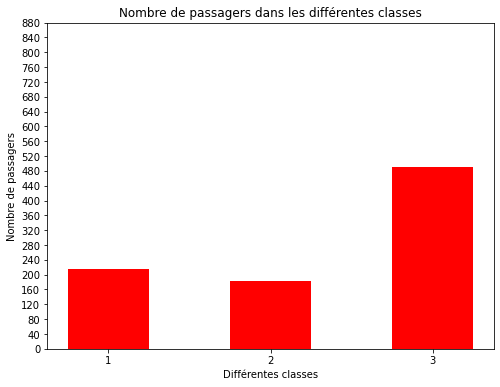

In [20]:
import matplotlib.pyplot as plt
 
allclass = list(data.keys()) # list contenant toutes les classes, soit l'axe des abscisses
nb = list(data.values()) # list contenant les nombres des passagers, soit l'axe des ordonnés
  
fig = plt.figure(figsize = (8, 6)) # création de la figure représentant le graphique
 
plt.bar(allclass, nb, color ='red', # création de la bar horizontale
        width = 0.5)
 
plt.xticks(allclass)
plt.yticks(range(0, total, 40))
plt.xlabel("Différentes classes")
plt.ylabel("Nombre de passagers")
plt.title("Nombre de passagers dans les différentes classes")
plt.show()

**Combien de femmes et d'hommes y avait-il dans chaque classe?**

In [21]:
data2 = {} # Les données des femmes sont stockées dans le premier éléement du tuple

for i in range(1, nbclass+1):  
    result2 = query(DatabaseManager.BDD1, 
                    "SELECT COUNT(*) FROM registered NATURAL JOIN passenger "
                    "NATURAL JOIN ticket WHERE Pclass=%s AND sex=%s;", i, 'female') # Requete pour les femmes suivant leur classe
    result3 = query(DatabaseManager.BDD1, 
                    "SELECT COUNT(*) FROM registered NATURAL JOIN passenger "
                    "NATURAL JOIN ticket WHERE Pclass=%s AND sex=%s;", i, 'male') # Requete pour les hommes suivant leur classe
    
    data2[i] = (result2[0][0], result3[0][0]) # Stockage des données renvoyées par la BDD
    

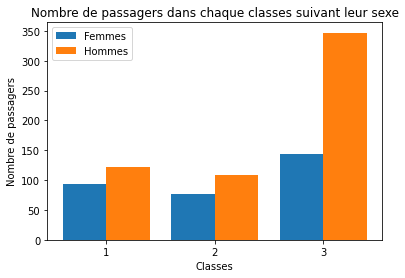

In [22]:
X = []
for k in data2.keys(): # Remplissage de la list représentant les classes soit l'axe des abscisses
    X.append(k)

Ywomen = []
Zmen = []

for i in data2.values(): # Remplissage du nombre de passager ayant survecu et mort 
    Ywomen.append(i[0])
    Zmen.append(i[1])
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ywomen, 0.4, label = 'Femmes') # Création des 2 bars différentes
plt.bar(X_axis + 0.2, Zmen, 0.4, label = 'Hommes') # Création des 2 bars différentes
  
plt.xticks(X_axis, X)
plt.xlabel("Classes")
plt.ylabel("Nombre de passagers")
plt.title("Nombre de passagers dans chaque classes suivant leur sexe")
plt.legend()
plt.show()

**Comptez le nombre et le pourcentage de survivants et de passagers
morts.**

In [23]:
result2 = query(DatabaseManager.BDD1, "SELECT COUNT(passengerid), survived, count(survived)*100/%s as pourcentage from passenger group by survived;", total)

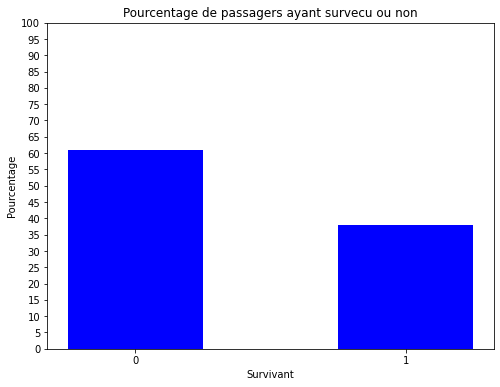

In [24]:
import matplotlib.pyplot as plt
 
data4 = {}

for i in result2:
    data4[i[1]] = (i[0], i[2]) # Stockage du pourcentage et du nombre de passagers en fonction de si ils ont survecu ou non
survived = list(data4.keys())
perc = []

for i in data4.values(): # Stockage dans une list séparée des pourcentages
    perc.append(i[1])
  
fig = plt.figure(figsize = (8, 6)) # création de la figure
 
plt.bar(survived, perc, color ='blue',
        width = 0.5)
 
plt.xticks(range(0, 2))
plt.yticks(range(0, 105, 5))
plt.xlabel("Survivant")
plt.ylabel("Pourcentage")
plt.title("Pourcentage de passagers ayant survecu ou non")
plt.show()

**Visualiser la répartition des passagers survivants et morts par classe**

In [25]:
result3 = query(DatabaseManager.BDD1, "SELECT survived, Pclass, COUNT(passengerId) FROM passenger NATURAL JOIN Ticket group by survived, pclass order by pclass asc;")

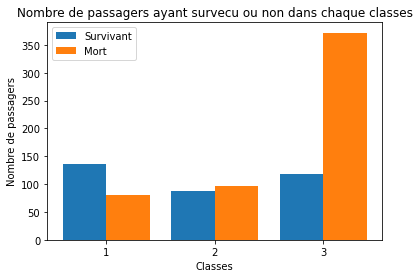

In [26]:
import matplotlib.pyplot as plt

X2 = []
Ysurvived = []
Znotsurvived = []

for i in result3: # Stockage et remplissage du nombre de passagers ayant survecu ou non suivant leurs classes à l'aide des données retournées par la BDD
    v = i[1]
    if not v in X2:
        X2.append(v)
    if i[0]:            
        Ysurvived.append(i[2])
    else:
        Znotsurvived.append(i[2])
  
X_axis = np.arange(len(X2))
  
plt.bar(X_axis - 0.2, Ysurvived, 0.4, label = 'Survivant')
plt.bar(X_axis + 0.2, Znotsurvived, 0.4, label = 'Mort')
  
plt.xticks(X_axis, X2)
plt.xlabel("Classes")
plt.ylabel("Nombre de passagers")
plt.title("Nombre de passagers ayant survecu ou non dans chaque classes")
plt.legend()
plt.show()

**Visualiser la répartition des passagers survivants et des passagers
décédés selon le sexe**

In [27]:
result4 = query(DatabaseManager.BDD1, "SELECT survived, sex, COUNT(passengerId) FROM passenger NATURAL JOIN Ticket group by survived, sex;")

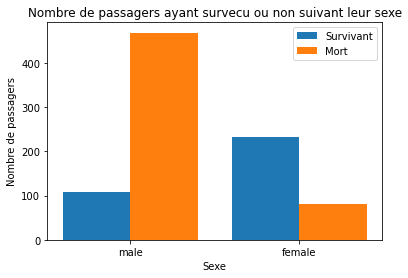

In [28]:
import matplotlib.pyplot as plt

sex = []
Ysurvived = []
Znotsurvived = []

for i in result4: # Stockage et remplissage du nombre de passagers ayant survecu ou non suivant leurs sexes à l'aide des données retournées par la BDD
    v = i[1]
    if not v in sex:
        sex.append(v)
    if i[0]:            
        Ysurvived.append(i[2])
    else:
        Znotsurvived.append(i[2])
         
X_axis = np.arange(len(sex))
  
plt.bar(X_axis - 0.2, Ysurvived, 0.4, label = 'Survivant')
plt.bar(X_axis + 0.2, Znotsurvived, 0.4, label = 'Mort')
  
plt.xticks(X_axis, sex)
plt.xlabel("Sexe")
plt.ylabel("Nombre de passagers")
plt.title("Nombre de passagers ayant survecu ou non suivant leur sexe")
plt.legend()
plt.show()

### On a terminé nos opérations sur la Base de données, on ferme donc le pool de connexion

In [29]:
DatabaseManager.closeAllDatabaseConnections()